<a href="https://colab.research.google.com/github/SahilGadge/Ways-to-Handle-Imbalenced-Dataset-Credit-Card-Fraud/blob/main/Handling_Imbalanced_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handling Imbalanced Dataset**

Name : Sahil Sanjay Gadge.





---



## **Abstract**



> #### **Imbalanced data is one of the major problem in the area of machine learning. This problem can be solved by analyzing the dataset in hand. There are several approaches that will help us to handle the problem of imbalanced classes. These are oversampling, undersampling, synthetic data generation (SMOTE), adaptive synthetic technique and ensemble methods. These methods are discussed in the sections below.**





---



## **Introductions**



> Any real world dataset may come along with several problems. The problem of imbalanced classes is one of them. The problem of imbalanced classes arises when one set of classes dominate over another set of classes. The former is called majority class while the latter is called minority class. It causes the machine learning model to be more biased towards majority class. It causes poor classification of minority classes. Hence, this problem throw the question of "accuracy" out of question. This is a very common problem in machine learning where we have datasets with a disproportionate ratio of observations in each class.

> Imbalanced classes problem is one of the major problems in the field of data science and machine learning. It is very important that we should properly deal with this problem and develop our machine learning model accordingly. If this not done, then we may end up with higher accuracy. But this higher accuracy is meaningless because it comes from a meaningless metric which is not suitable for the dataset in question. Hence, this higher accuracy no longer reliably measures model performance.







---



## **Problems with imbalanced learning**



> The problem of imbalanced classes is very common and it is bound to happen. For example, in the above example the number of patients who do not have the rare disease is much larger than the number of patients who have the rare disease. So, the model does not correctly classify the patients who have the rare disease. This is where the problem arises.

Significant problems may arise with imbalanced learning. These are as follows:-


1.   The class distribution is skewed when the dataset has underrepresented data.
2.   The high level of accuracy is simply misleading. In the previous example, it is high because most patients do not have the disease not because of the good model.
3. There may be inherent complex characteristics in the dataset. Imbalanced learning from such dataset requires new approaches, principles, tools and techniques. But, it cannot guarantee an efficient solution to the business problem.






## **Example of imbalanced classes**


*   Fraud detection

*   Disease detection
*   Earthquake prediction




## **Data**

### **Data Import**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('gdrive/My Drive/Kaggle/CreditCard/creditcard.csv')

### **Data Checking**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No Frauds = 99.83 % Total No-fraud values = 284315
Frauds = 0.17 % Total fraud values = 492


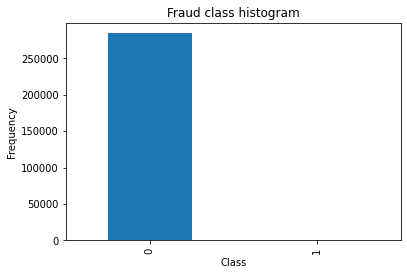

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

print('No Frauds =', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% Total No-fraud values =',df['Class'].value_counts()[0])
print('Frauds =', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% Total fraud values =', df['Class'].value_counts()[1])

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:

import statsmodels.api as sm
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Class   R-squared (uncentered):                   0.522
Model:                            OLS   Adj. R-squared (uncentered):              0.522
Method:                 Least Squares   F-statistic:                          1.036e+04
Date:                Fri, 17 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:25:16   Log-Likelihood:                      6.0682e+05
No. Observations:              284807   AIC:                                 -1.214e+06
Df Residuals:                  284777   BIC:                                 -1.213e+06
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

P-Value of scaled_time variable is high so dropping it

In [ ]:
X.drop(['scaled_time'], axis=1, inplace=True)

## **Accuracy of model**


Standard classification metrics do not represent the model performance in the case of imbalanced classes. Consider the above example, where we build a classifier to predict whether a patient has an extremely rare disease. The classifier yields 99% accuracy which looks good. But this 99% accuracy correctly classifies the 99% of healthy people as disease-free and incorrectly classifies the 1% of people which have the rare disease as healthy. There are several standard metrics which are used to evaluate classification model performance. These metrics are discussed in the following sections.



> **Confusion matrix**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category.




> **Accuracy**

Accuracy is defined as the percentage of correctly classified observations. It can be calculated by dividing the number of correct predictions by the total number of predictions.

Accuracy = Correct predictions/Total number of predictions

Mathematically, in confusion matrix terminology, accuracy can be given as

Accuracy = (True Positives + True Negatives)/Total Sample Size

> **Precision**

Precision is defined as the percentage of relevant observations that were actually belong to a certain class among all the samples which were predicted to belong to the same class.

Mathematically, it can be given as

Precision = True Positives / (True Positives + False Positives)



> **Recall**

Sensitivity or Recall is defined as the percentage of observations that were predicted to belong to a certain class among all the samples that truly belong to that class.

Mathematically, it can be given as

Recall = True Positives / (True Positives + False Negatives)
















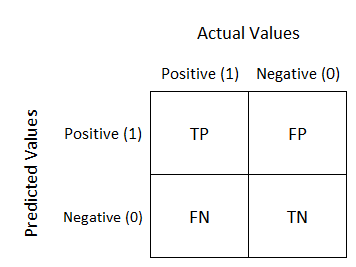

## **Approaches to handle imbalanced classes**




> 1.   Undersampling methods
1.   Oversampling methods
2.   Synthetic data generation
2.   Cost sensitive learning
5.   Ensemble methods

In this notebook we will go through first 3 methods with implemetation















### **1. Undersampling methods**

The undersampling methods work with the majority class. In these methods, we randomly eliminate instances of the majority class. It reduces the number of observations from majority class to make the dataset balanced. It results in severe loss of information. This method is applicable when the dataset is huge and reducing the number of training samples make the dataset balanced.

Undersampling methods are of two types – random and informative.

####**1.1 Random undersampling**









In random undersampling method, we balance the imbalanced class distribution by choosing and eliminating observations from majority class to make the dataset balanced.

This approach has several advantages and disadvantages which are listed below:-

**Advantages**


*   If the dataset is huge, we might face run time and storage problems. 
*   Undersampling can help to handle these problems successfully by improving run time and storage problems by reducing the number of training data samples.




**Disadvantages**


*   This method can discard potentially useful information which could be important for building the classifiers.
*   The sample chosen by random under sampling may be a biased one. It may not be an accurate representation of the population. So, it results in inaccurate results with the actual dataset.



In [ ]:
# check version number
#import imblearn imbalanced learn lib
import imblearn
print(imblearn.__version__)
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

0.8.1


In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority') #Random undersampling
X_under, y_under = undersample.fit_resample(X, y) #fit and undersample

In [ ]:
print('No Frauds =', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% Total No-fraud values =',y_under.value_counts()[0]) 
print('Frauds =', round(y_under.value_counts()[1]/len(y_under) * 100,2), '% Total fraud values =', y_under.value_counts()[1])
print(Counter(y_under))

No Frauds = 50.0 % Total No-fraud values = 492
Frauds = 50.0 % Total fraud values = 492
Counter({0: 492, 1: 492})


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset in test, train
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [ ]:
# To check effectiveness of udersampling we will test dataset with 4 models
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 94.0 % accuracy score


Using grid search to find best hyperparameters for model

In [ ]:

from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

Let's test on testing set

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg.predict(X_test)))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_neighbors.predict(X_test)))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc.predict(X_test)))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_clf.predict(X_test)))

Logistic Regression:  0.933776540919398
KNears Neighbors:  0.9439806225520511
Support Vector Classifier:  0.933776540919398
Decision Tree Classifier:  0.9133168418882706


Testing prediction accuracy is similar to training set so models are not overfitting but still lets further analise the prediction

Logistic Regression's scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, log_reg.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_reg.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, log_reg.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_reg.predict(X_test))))

Recall Score: 0.89
Precision Score: 0.98
F1 Score: 0.93
Accuracy Score: 0.93


KNN's scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, knears_neighbors.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, knears_neighbors.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, knears_neighbors.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, knears_neighbors.predict(X_test))))

Recall Score: 0.91
Precision Score: 0.98
F1 Score: 0.94
Accuracy Score: 0.94


Confusion Matrix plot

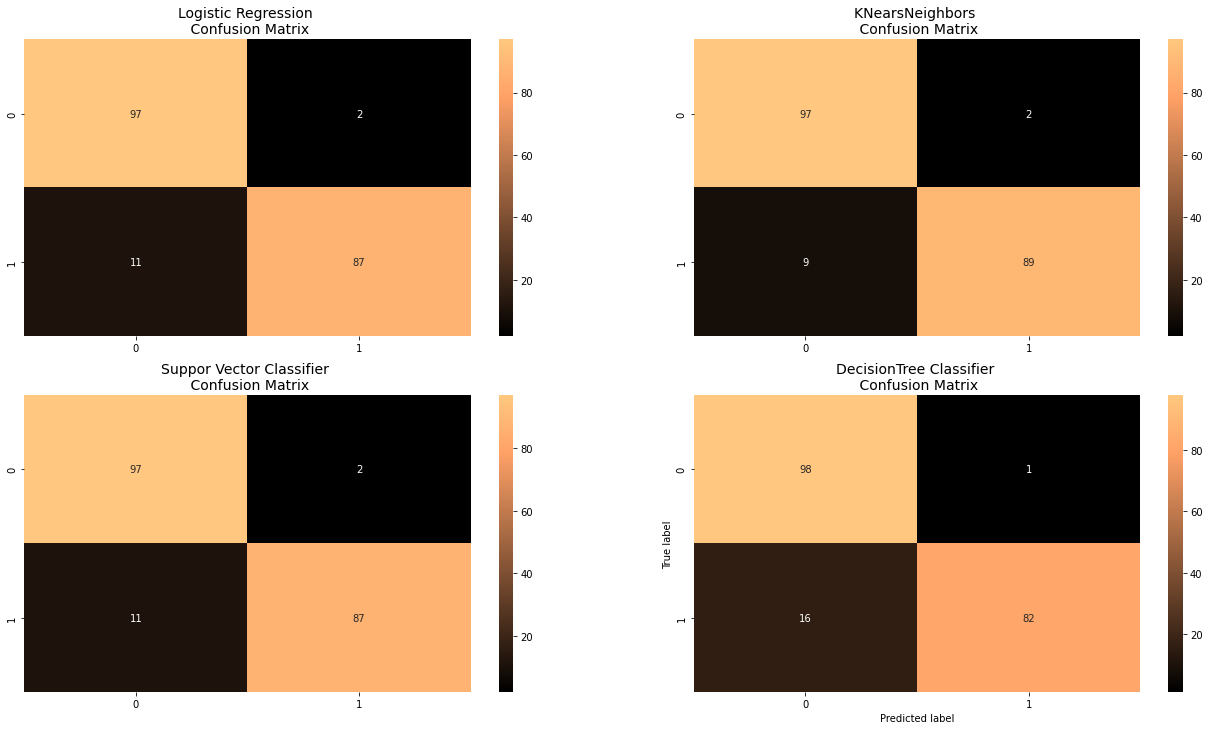

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')


plt.show()

SVM and logistic prodused similar, KNN is best here.  


####**1.2 Informative undersampling**









In informative undersampling, we follow a pre-defined selection criterion to remove the observations from majority class. Within this informative undersampling technique, we have EasyEnsemble and BalanceCascade algorithms. These algorithms produce good results and are relatively easy to follow.


#####**1.2.1 Near Miss**









There are three versions of the technique, named NearMiss-1, NearMiss-2, and NearMiss-3.

NearMiss-1 selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class. NearMiss-2 selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class. NearMiss-3 involves selecting a given number of majority class examples for each example in the minority class that are closest.

Here, distance is determined in feature space using Euclidean distance or similar.


*   NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
*   NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
*   NearMiss-3: Majority class examples with minimum distance to each minority class example.



######**1.2.1.1 Near Miss 1**









NearMiss-1
In NearMiss-1 sampling technique, we select samples from the majority class for which the average distance of the N closest samples of a minority class is smallest.

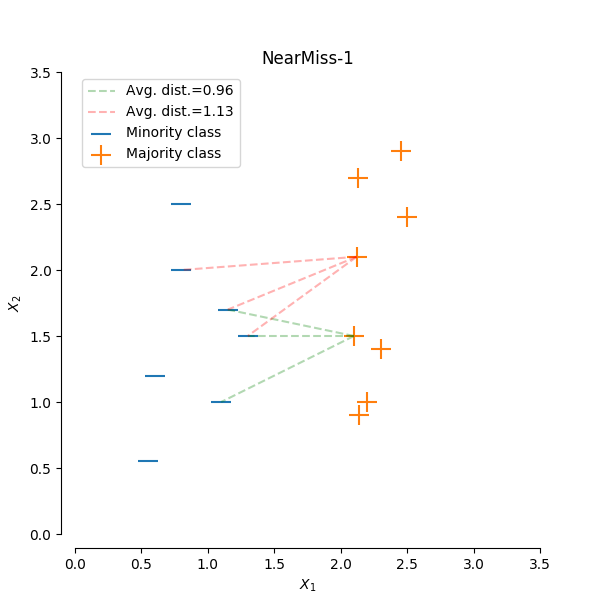

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('gdrive/My Drive/Kaggle/CreditCard/creditcard.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

X = df.drop('Class', axis=1)
y = df['Class']

X.drop(['scaled_time'], axis=1, inplace=True)

In [ ]:

# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from imblearn.under_sampling import NearMiss

counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_n1, y_n1 = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_n1)
print(counter)

Counter({0: 284315, 1: 492})
Counter({0: 492, 1: 492})


In [ ]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X_n1, y_n1, test_size=0.2, random_state=42)

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 96.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.8, 1], 'kernel': ['linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

ROC_AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg.predict(X_test)))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_neighbors.predict(X_test)))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc.predict(X_test)))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_clf.predict(X_test)))

Logistic Regression:  0.9390331890331891
KNears Neighbors:  0.933879612451041
Support Vector Classifier:  0.9389816532673675
Decision Tree Classifier:  0.9388270459699032


Logistic Regression Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, log_reg.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_reg.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, log_reg.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_reg.predict(X_test))))

Recall Score: 0.93
Precision Score: 0.95
F1 Score: 0.94
Accuracy Score: 0.94


KNN Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, knears_neighbors.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, knears_neighbors.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, knears_neighbors.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, knears_neighbors.predict(X_test))))

Recall Score: 0.91
Precision Score: 0.96
F1 Score: 0.93
Accuracy Score: 0.93


Confusion Metrix

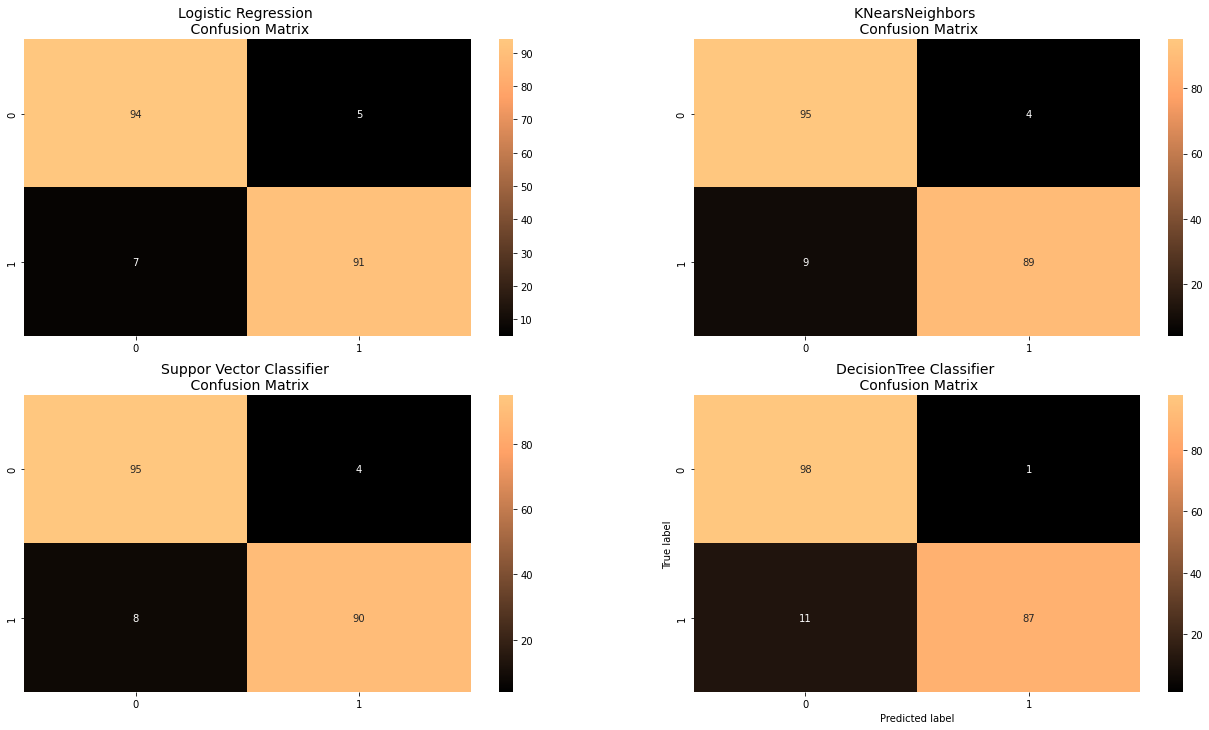

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')


plt.show()


######**1.2.1.2 Near Miss 2**









In NearMiss-2 sampling technique, we select samples from the majority class for which the average distance of the N farthest samples of a minority class is smallest.

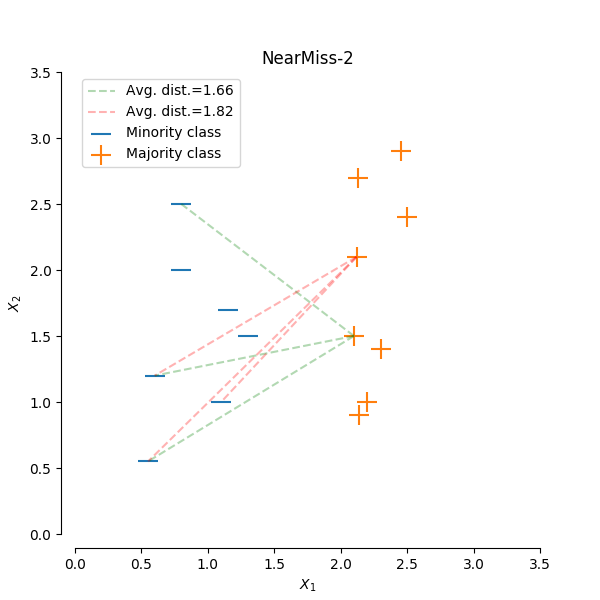

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('gdrive/My Drive/Kaggle/CreditCard/creditcard.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

X = df.drop('Class', axis=1)
y = df['Class']

X.drop(['scaled_time'], axis=1, inplace=True)

In [ ]:

# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from imblearn.under_sampling import NearMiss

counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X_n1, y_n1 = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_n1)
print(counter)

Counter({0: 284315, 1: 492})
Counter({0: 492, 1: 492})


In [ ]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X_n1, y_n1, test_size=0.2, random_state=42)

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 98.0 % accuracy score
Classifiers:  SVC Has a training score of 95.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 98.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.8, 1], 'kernel': ['linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

ROC_AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg.predict(X_test)))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_neighbors.predict(X_test)))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc.predict(X_test)))
print('Random forest Classifier: ', roc_auc_score(y_test, tree_clf.predict(X_test)))

Logistic Regression:  0.9238301381158524
KNears Neighbors:  0.9846938775510203
Support Vector Classifier:  0.923881673881674
Random forest Classifier:  0.9747474747474748


Logistic Regression Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, log_reg.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_reg.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, log_reg.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_reg.predict(X_test))))

Recall Score: 0.92
Precision Score: 0.93
F1 Score: 0.92
Accuracy Score: 0.92


KNN Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, knears_neighbors.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, knears_neighbors.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, knears_neighbors.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, knears_neighbors.predict(X_test))))

Recall Score: 0.97
Precision Score: 1.00
F1 Score: 0.98
Accuracy Score: 0.98


Decision Tree Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, grid_tree.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, grid_tree.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, grid_tree.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, grid_tree.predict(X_test))))

Recall Score: 1.00
Precision Score: 0.95
F1 Score: 0.98
Accuracy Score: 0.97


Confusion Metrix

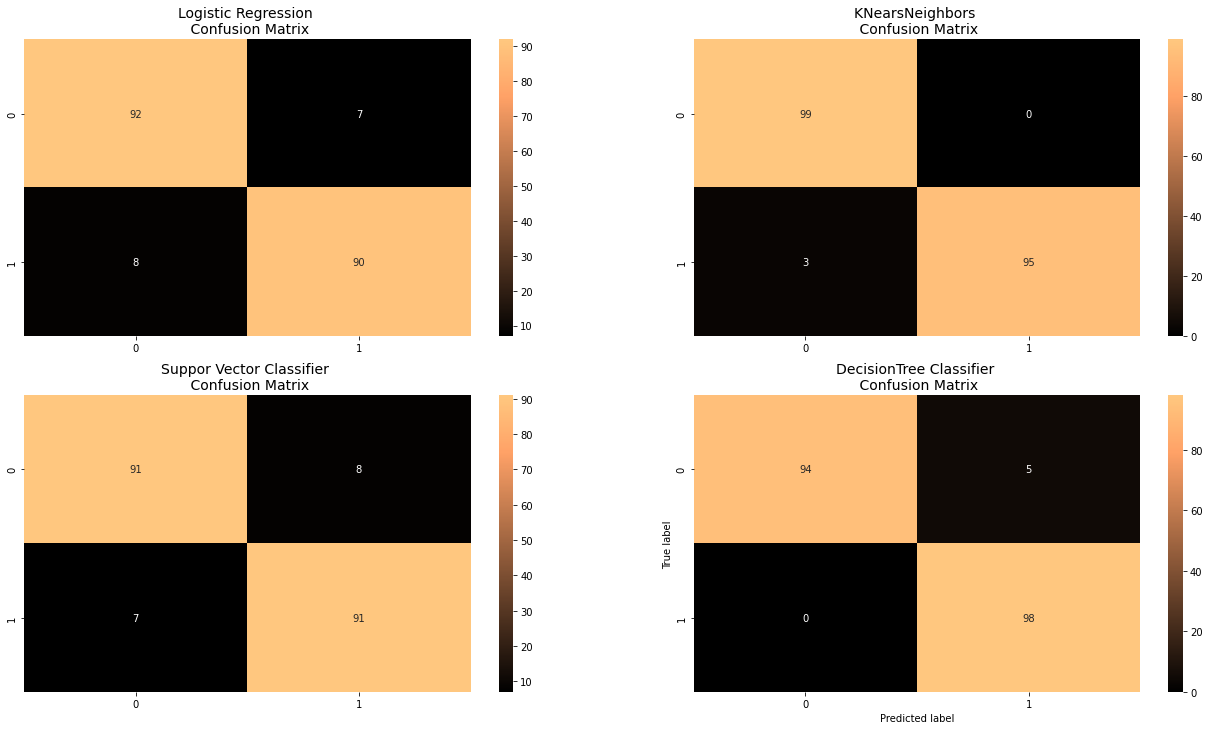

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')


plt.show()


#####**1.2.2 Tomek links**









A Tomeks link can be defined as the set of two observations of different classes which are nearest neighbours of each other.

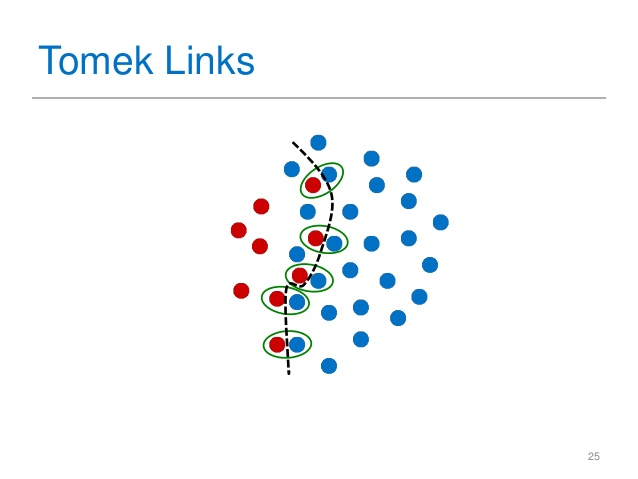

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('gdrive/My Drive/Kaggle/CreditCard/creditcard.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

X = df.drop('Class', axis=1)
y = df['Class']

X.drop(['scaled_time'], axis=1, inplace=True)

In [ ]:

# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from imblearn.under_sampling import TomekLinks
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X_tomen, y_tomen = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_tomen)
print(counter)

Counter({0: 50000, 1: 492})
Counter({0: 49975, 1: 492})


In [ ]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X_tomen, y_tomen, test_size=0.2, random_state=42)

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 100.0 % accuracy score
Classifiers:  SVC Has a training score of 100.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.8, 1], 'kernel': ['linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

ROC_AUC score on Test set

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg.predict(X_test)))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_neighbors.predict(X_test)))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc.predict(X_test)))
print('Random forest Classifier: ', roc_auc_score(y_test, tree_clf.predict(X_test)))

Logistic Regression:  0.8860385438123518
KNears Neighbors:  0.8909890388618567
Support Vector Classifier:  0.886088578836869
Random forest Classifier:  0.886088578836869


Logistic Regression Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, log_reg.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_reg.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, log_reg.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_reg.predict(X_test))))

Recall Score: 0.77
Precision Score: 0.97
F1 Score: 0.86
Accuracy Score: 1.00


KNN scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, knears_neighbors.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, knears_neighbors.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, knears_neighbors.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, knears_neighbors.predict(X_test))))

Recall Score: 0.78
Precision Score: 0.98
F1 Score: 0.87
Accuracy Score: 1.00


Random Forest Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, grid_tree.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, grid_tree.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, grid_tree.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, grid_tree.predict(X_test))))

Recall Score: 0.77
Precision Score: 0.99
F1 Score: 0.87
Accuracy Score: 1.00


Confusion Matrix

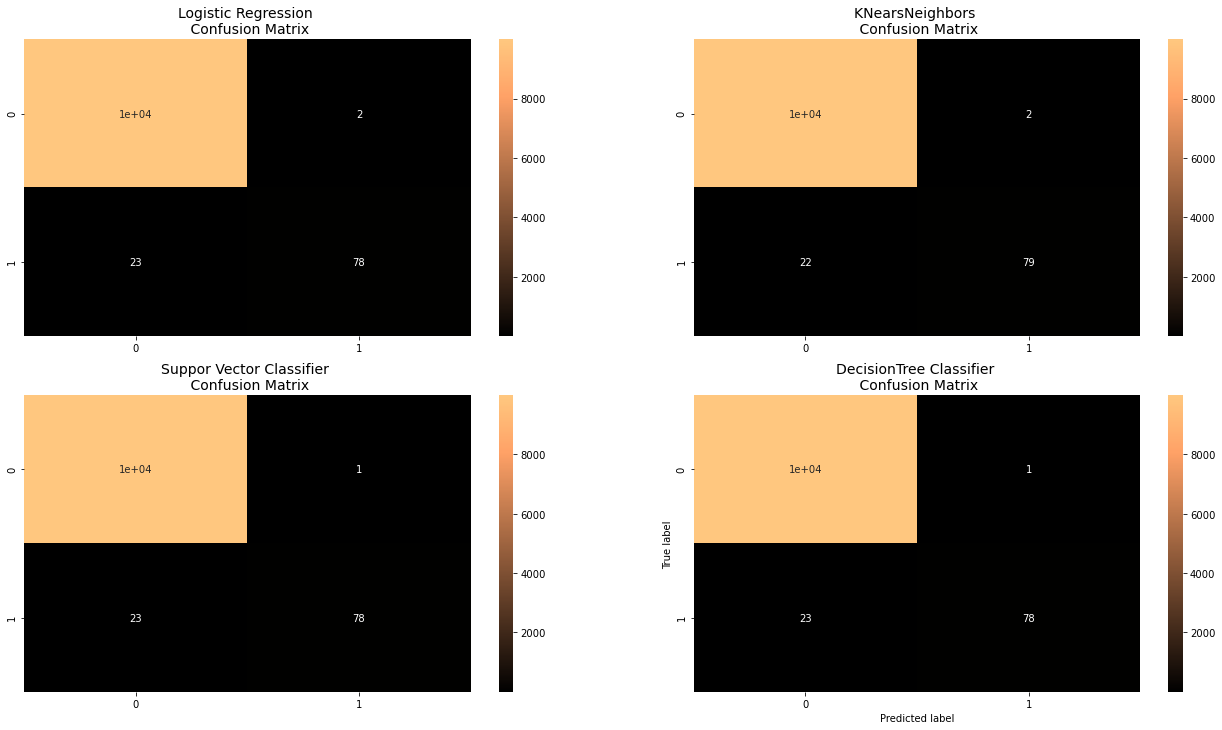

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')


plt.show()

### **2. Oversampling methods**

The Oversampling methods work with the minority class. In these methods, we duplicate random instances of the minority class. So, it replicates the observations from minority class to balance the data. It is also known as upsampling. It may result in overfitting due to duplication of data points.

####**2.1 Random oversampling**










In random oversampling, we balance the data by randomly oversampling the minority class.

This approach has several advantages and disadvantages which are listed below:-

**Advantages**


*   An advantage of this method is that it leads to no information loss.
*   This method outperform under sampling.




**Disadvantages**


*   This method increases the likelihood of overfitting as it replicates the minority class labels.

##### **Data**

###### **Data Import**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('gdrive/My Drive/Kaggle/CreditCard/creditcard.csv')

In [ ]:
label_1 = df[df['Class'] == 0]
index_to_drop = label_1.sample(234315).index
df = df.drop(index_to_drop)

In [ ]:
df.shape

(50492, 31)

###### **Data Checking**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50492 entries, 9 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50492 non-null  float64
 1   V1      50492 non-null  float64
 2   V2      50492 non-null  float64
 3   V3      50492 non-null  float64
 4   V4      50492 non-null  float64
 5   V5      50492 non-null  float64
 6   V6      50492 non-null  float64
 7   V7      50492 non-null  float64
 8   V8      50492 non-null  float64
 9   V9      50492 non-null  float64
 10  V10     50492 non-null  float64
 11  V11     50492 non-null  float64
 12  V12     50492 non-null  float64
 13  V13     50492 non-null  float64
 14  V14     50492 non-null  float64
 15  V15     50492 non-null  float64
 16  V16     50492 non-null  float64
 17  V17     50492 non-null  float64
 18  V18     50492 non-null  float64
 19  V19     50492 non-null  float64
 20  V20     50492 non-null  float64
 21  V21     50492 non-null  float64
 2

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000,50492.000000
mean,94666.694546,-0.034791,0.028687,-0.060315,0.042823,-0.024034,-0.009073,-0.045790,0.003818,-0.018724,-0.038712,0.031196,-0.049316,-0.002702,-0.062456,-0.000317,-0.033267,-0.051362,-0.020818,0.007344,0.004156,0.010993,0.003139,0.006119,-0.004047,0.002011,0.001596,0.000902,0.001555,88.645206,0.009744
std,47414.598494,2.078291,1.716184,1.756281,1.490608,1.456585,1.327915,1.448498,1.314653,1.141530,1.283026,1.100129,1.211928,0.995050,1.206232,0.914658,1.006998,1.209291,0.895169,0.815929,0.765376,0.799898,0.737084,0.621981,0.604632,0.522382,0.479050,0.426893,0.351878,244.942723,0.098231
min,0.000000,-56.407510,-72.715728,-31.813586,-5.401678,-27.737487,-26.160506,-43.557242,-41.044261,-13.434066,-24.588262,-4.568390,-18.683715,-3.733640,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.384828,-25.222345,-22.797604,-8.887017,-30.269720,-2.836627,-6.429334,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54039.500000,-0.929435,-0.595264,-0.935266,-0.840279,-0.701229,-0.772909,-0.563152,-0.207071,-0.659521,-0.538510,-0.760403,-0.419784,-0.651808,-0.447591,-0.579367,-0.477771,-0.488532,-0.506310,-0.450171,-0.211721,-0.226482,-0.543565,-0.162225,-0.360541,-0.316310,-0.324568,-0.070935,-0.053313,5.490000,0.000000
50%,84615.000000,0.011698,0.073143,0.168246,0.002003,-0.060936,-0.278347,0.033803,0.022751,-0.053668,-0.096839,-0.025717,0.133143,-0.015350,0.041340,0.049553,0.060935,-0.063366,-0.008012,0.005322,-0.062290,-0.025710,0.011892,-0.010860,0.038459,0.016808,-0.050532,0.001887,0.011594,22.140000,0.000000
75%,139121.500000,1.315404,0.813294,1.023638,0.774630,0.601024,0.394860,0.560541,0.331949,0.592376,0.455254,0.759512,0.614174,0.657646,0.482499,0.647871,0.516422,0.398751,0.496389,0.464544,0.137145,0.191658,0.539396,0.148784,0.435710,0.351317,0.241938,0.092807,0.079781,78.000000,0.000000
max,172786.000000,2.451888,22.057729,9.382558,16.491217,34.801666,16.410638,25.971058,20.007208,15.594995,23.745136,12.018913,4.293342,4.262851,7.439566,5.784514,5.562388,7.893393,4.115560,5.228342,26.237391,27.202839,8.361985,15.719952,4.014444,5.376595,3.155327,8.104297,33.847808,12910.930000,1.000000


No Frauds = 99.03 % Total No-fraud values = 50000
Frauds = 0.97 % Total fraud values = 492


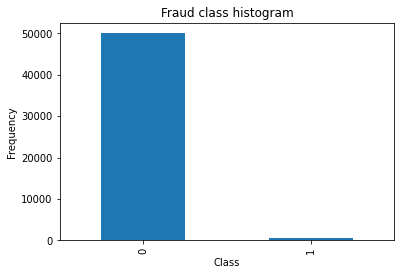

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

print('No Frauds =', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% Total No-fraud values =',df['Class'].value_counts()[0])
print('Frauds =', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% Total fraud values =', df['Class'].value_counts()[1])

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Class   R-squared (uncentered):                   0.620
Model:                            OLS   Adj. R-squared (uncentered):              0.619
Method:                 Least Squares   F-statistic:                              2740.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:17:04   Log-Likelihood:                          69673.
No. Observations:               50492   AIC:                                 -1.393e+05
Df Residuals:                   50462   BIC:                                 -1.390e+05
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
X.drop(['scaled_time'], axis=1, inplace=True)

##### **Training Random Oversampling**

In [ ]:

# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 50000, 1: 492})
Counter({0: 50000, 1: 50000})


In [ ]:
print('No Frauds =', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% Total No-fraud values =',y_over.value_counts()[0])
print('Frauds =', round(y_over.value_counts()[1]/len(y_over) * 100,2), '% Total fraud values =', y_over.value_counts()[1])
print(Counter(y_over))

No Frauds = 50.0 % Total No-fraud values = 50000
Frauds = 50.0 % Total fraud values = 50000
Counter({0: 50000, 1: 50000})


In [ ]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 100.0 % accuracy score
Classifiers:  SVC Has a training score of 96.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.8, 1], 'kernel': ['linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg.predict(X_test)))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_neighbors.predict(X_test)))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc.predict(X_test)))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_clf.predict(X_test)))

Logistic Regression:  0.9488429469012223
KNears Neighbors:  0.9990536906066341
Support Vector Classifier:  0.9498449121411138
Decision Tree Classifier:  0.9376347464244931


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, log_reg.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_reg.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, log_reg.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_reg.predict(X_test))))

Recall Score: 0.92
Precision Score: 0.97
F1 Score: 0.95
Accuracy Score: 0.95


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, knears_neighbors.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, knears_neighbors.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, knears_neighbors.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, knears_neighbors.predict(X_test))))

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00


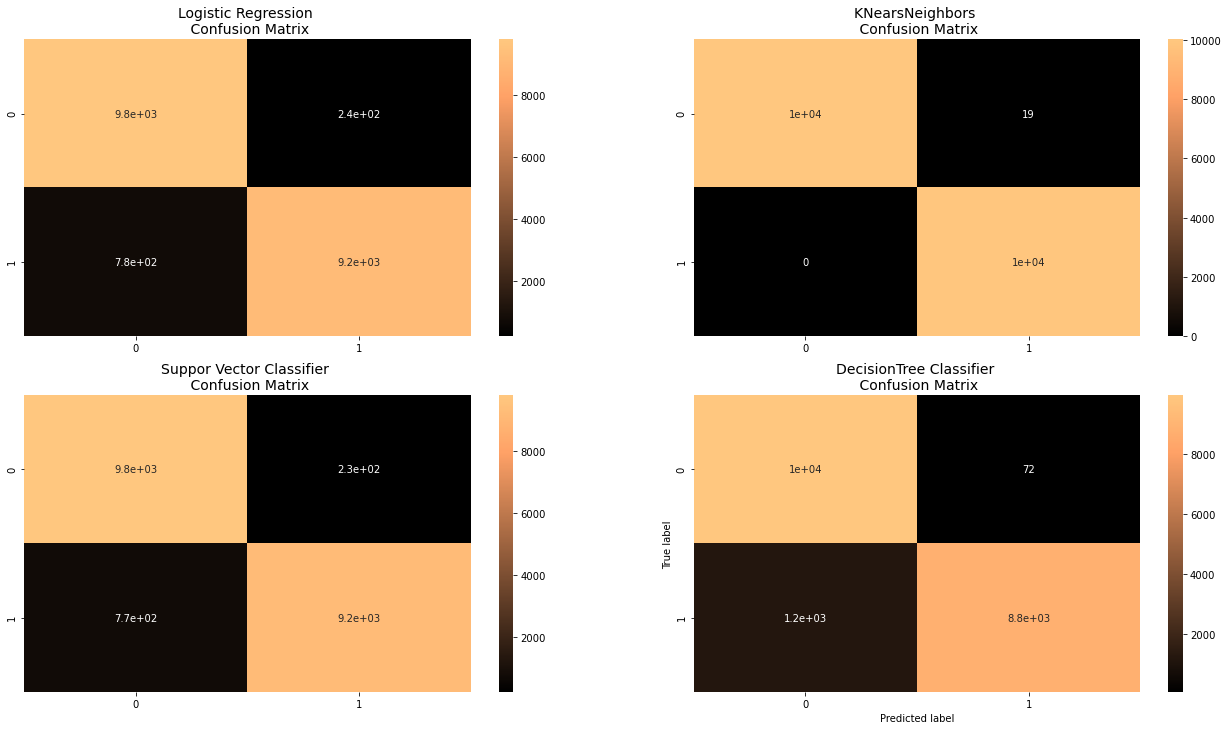

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')


plt.show()

####**2.2 *Cluster* based oversampling**









In this method, the K-Means clustering algorithm technique is independently applied to minority and majority class labels. Thus we will identify clusters in the dataset. Subsequently, each cluster is oversampled such that all clusters of the same class have an equal number of instances and all classes have the same size.

Advantages


*   This clustering technique helps to overcome the challenge of imbalanced class distribution.
*   Also, this technique overcome the challenges within class imbalance, where a class is composed of different sub clusters and each sub cluster does not contain the same number of examples.


Disadvantages


*   The disadvantage associated with this technique is the possibility of overfitting the training data.




#####**Train**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('creditcard.csv')

label_1 = df[df['Class'] == 0]
index_to_drop = label_1.sample(234315).index
df = df.drop(index_to_drop)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

X = df.drop('Class', axis=1)
y = df['Class']

X.drop(['scaled_time'], axis=1, inplace=True)

In [ ]:

# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from imblearn.over_sampling import KMeansSMOTE
counter = Counter(y)
print(counter)
# define the undersampling method
oversample = KMeansSMOTE(sampling_strategy='auto')
# transform the dataset
X_km, y_km = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_km)
print(counter)

Counter({0: 50000, 1: 492})
Counter({0: 50000, 1: 50000})


In [ ]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X_km, y_km, test_size=0.2, random_state=42)

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 100.0 % accuracy score
Classifiers:  SVC Has a training score of 100.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.8, 1], 'kernel': ['linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg.predict(X_test)))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_neighbors.predict(X_test)))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc.predict(X_test)))
print('Random forest Classifier: ', roc_auc_score(y_test, tree_clf.predict(X_test)))

Logistic Regression:  0.9989971131414718
KNears Neighbors:  0.9989967031345797
Support Vector Classifier:  0.9987979297931998
Random forest Classifier:  0.9990971148225003


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, log_reg.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_reg.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, log_reg.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_reg.predict(X_test))))

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, knears_neighbors.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, knears_neighbors.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, knears_neighbors.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, knears_neighbors.predict(X_test))))

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, grid_tree.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, grid_tree.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, grid_tree.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, grid_tree.predict(X_test))))

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00


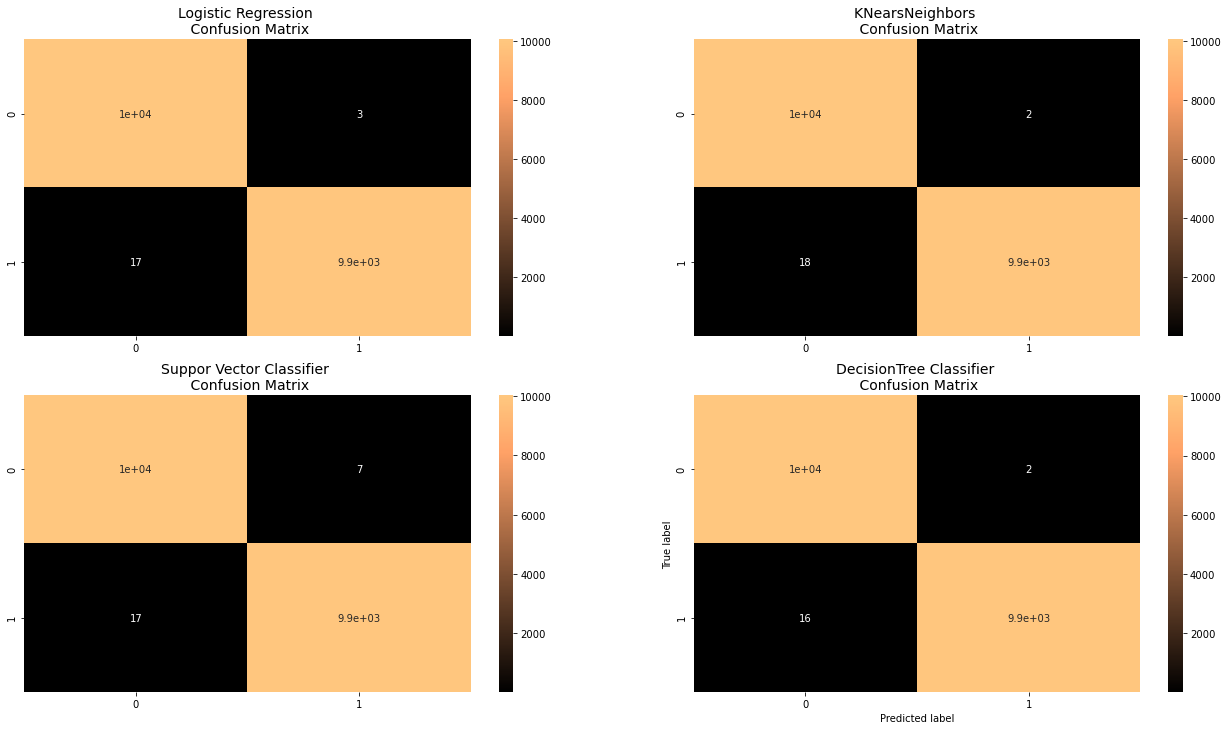

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')


plt.show()

In [ ]:
counter = Counter(y_test)
print(counter)

Counter({0: 10041, 1: 9959})


####**2.3 ADASYN oversampling**









ADASYN is similar to SMOTE, and derived from it, featuring just one important difference. it will bias the sample space (that is, the likelihood that any particular point will be chosen for duping) towards points which are located not in homogenous neighborhoods. Applied to our sample data, this results in the following:

#####Train

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('creditcard.csv')

label_1 = df[df['Class'] == 0]
index_to_drop = label_1.sample(254315).index
df = df.drop(index_to_drop)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

X = df.drop('Class', axis=1)
y = df['Class']

X.drop(['scaled_time'], axis=1, inplace=True)

In [ ]:

# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from imblearn.over_sampling import ADASYN
counter = Counter(y)
print(counter)
# define the undersampling method
oversample = ADASYN()
# transform the dataset
X_ad, y_ad = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_ad)
print(counter)

Counter({0: 30000, 1: 492})
Counter({1: 30015, 0: 30000})


In [ ]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)
counter = Counter(y_test)
print(counter)

Counter({1: 6136, 0: 5867})


In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 86.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.0 % accuracy score
Classifiers:  SVC Has a training score of 98.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 1]}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

ROC_AUC Scores

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg.predict(X_test)))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_neighbors.predict(X_test)))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc.predict(X_test)))
print('Random forest Classifier: ', roc_auc_score(y_test, tree_clf.predict(X_test)))

Logistic Regression:  0.8621802464406024
KNears Neighbors:  0.9964206579171637
Support Vector Classifier:  0.9845822123120745
Random forest Classifier:  0.8810382369823571


Logitic Test Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, log_reg.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_reg.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, log_reg.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_reg.predict(X_test))))

Recall Score: 0.84
Precision Score: 0.88
F1 Score: 0.86
Accuracy Score: 0.86


KNN Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, knears_neighbors.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, knears_neighbors.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, knears_neighbors.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, knears_neighbors.predict(X_test))))

Recall Score: 1.00
Precision Score: 0.99
F1 Score: 1.00
Accuracy Score: 1.00


Confusion Metrix

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, grid_tree.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, grid_tree.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, grid_tree.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, grid_tree.predict(X_test))))

Recall Score: 0.84
Precision Score: 0.92
F1 Score: 0.88
Accuracy Score: 0.88


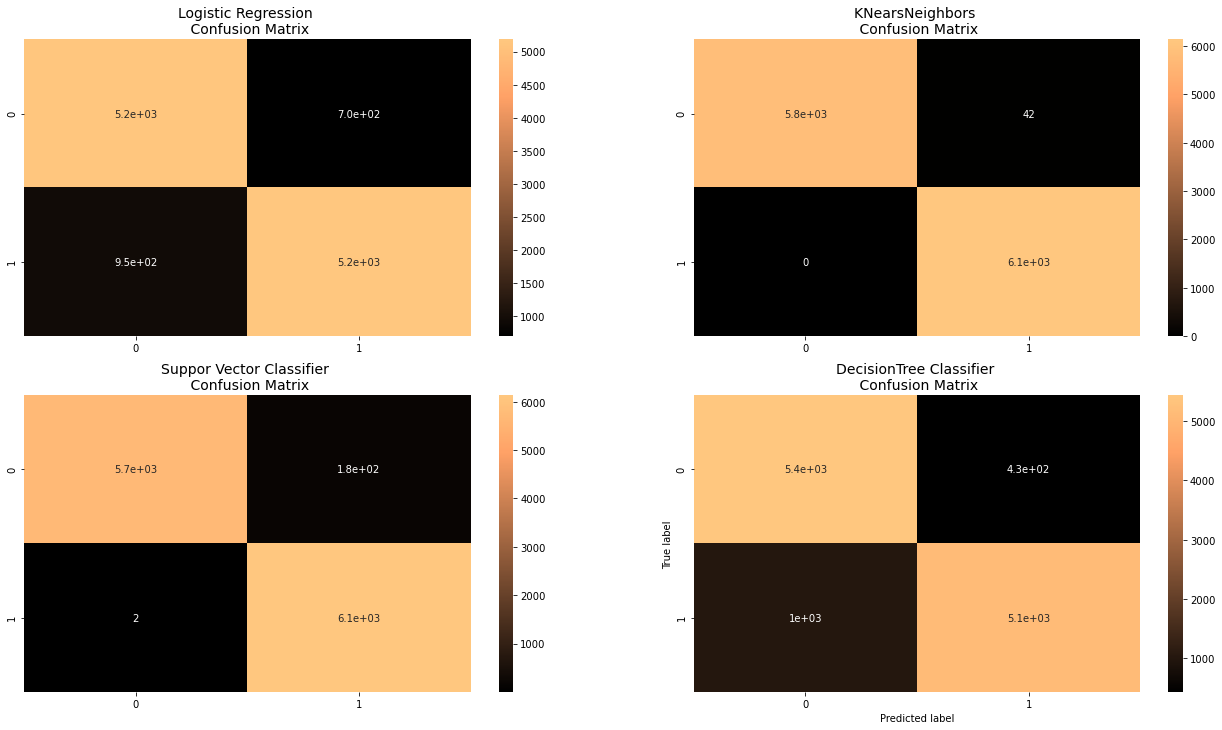

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')


plt.show()

### **3. Synthetic data generation**

In synthetic data generation technique, we overcome the data imbalances by generating artificial data. So, it is also a type of oversampling technique.


####**Synthetic Minority Oversampling Technique or SMOTE**

In the context of synthetic data generation, there is a powerful and widely used method known as synthetic minority oversampling technique or SMOTE. Under this technique, artificial data is created based on feature space. Artificial data is generated with bootstrapping and k-nearest neighbours algorithm. It works as follows:-


1.   First of all, we take the difference between the feature vector (sample) under consideration and its nearest neighbour.

1.   Then we multiply this difference by a random number between 0 and 1.

2.   Then we add this number to the feature vector under consideration.



2.   Thus we select a random point along the line segment between two specific features.











**Disadvantages**


*   This method increases the likelihood of overfitting as it replicates the minority class labels.








So, SMOTE generates new observations by interpolation between existing observations in the dataset.

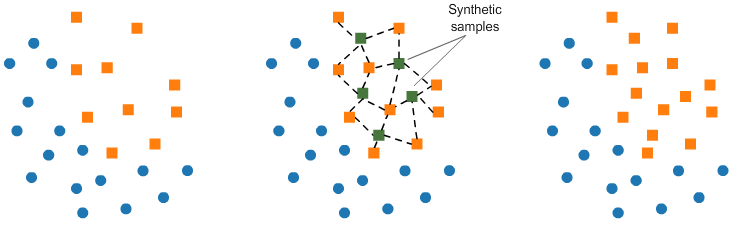

##### **Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('gdrive/My Drive/Kaggle/CreditCard/creditcard.csv')

In [ ]:
label_1 = df[df['Class'] == 0]
index_to_drop = label_1.sample(234315).index
df = df.drop(index_to_drop)

In [ ]:
df.shape

(50492, 31)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X.drop(['scaled_time'], axis=1, inplace=True)

##### **Training**

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_smote)
print(counter)

Counter({0: 50000, 1: 492})
Counter({0: 50000, 1: 50000})


In [ ]:
print('No Frauds =', round(y_smote.value_counts()[0]/len(y_smote) * 100,2), '% Total No-fraud values =',y_smote.value_counts()[0])
print('Frauds =', round(y_smote.value_counts()[1]/len(y_smote) * 100,2), '% Total fraud values =', y_smote.value_counts()[1])
print(Counter(y_smote))

No Frauds = 50.0 % Total No-fraud values = 50000
Frauds = 50.0 % Total fraud values = 50000
Counter({0: 50000, 1: 50000})


In [ ]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.0 % accuracy score
Classifiers:  SVC Has a training score of 96.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV

    
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.8, 1]}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

ROC AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg.predict(X_test)))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_neighbors.predict(X_test)))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc.predict(X_test)))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_clf.predict(X_test)))

Logistic Regression:  0.9493194375992996
KNears Neighbors:  0.998258013139558
Support Vector Classifier:  0.9633362941959852
Decision Tree Classifier:  0.932819358457625


Logistic Regression Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, log_reg.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_reg.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, log_reg.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_reg.predict(X_test))))

Recall Score: 0.92
Precision Score: 0.98
F1 Score: 0.95
Accuracy Score: 0.95


KNN Scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, knears_neighbors.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, knears_neighbors.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, knears_neighbors.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, knears_neighbors.predict(X_test))))

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00


SVM scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, svc.predict(X_test))))
print('Precision Score: {:.2f}'.format(precision_score(y_test, svc.predict(X_test))))
print('F1 Score: {:.2f}'.format(f1_score(y_test, svc.predict(X_test))))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Recall Score: 0.94
Precision Score: 0.99
F1 Score: 0.96
Accuracy Score: 0.96


Confusion Matrix

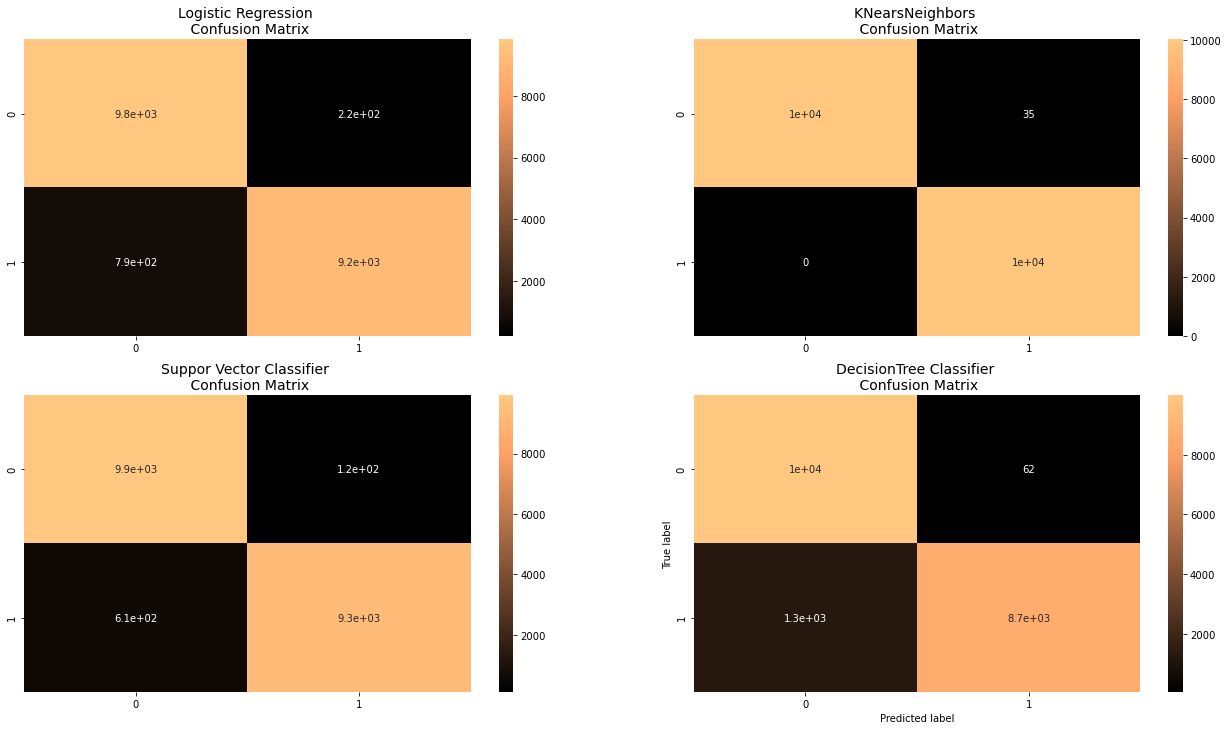

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')


plt.show()

### **4. Cost sensitive learning**

Cost sensitive learning is another commonly used method to handle imbalanced classification problem. This method evaluates the cost associated with misclassifying the observations.

This method does not create balanced data distribution. Rather it focusses on the imbalanced learning problem by using cost matrices which describes the cost for misclassification in a particular scenario. Researches have shown that this cost sensitive learning may outperform sampling methods. So, it provides likely alternative to sampling methods.

### **5. Algorithmic ensemble methods**


So far we have looked at techniques to provide balanced datasets. In this section, we will take a look at an alternative approach to deal with imbalanced datasets. In this approach, we modify the existing classification algorithms to make them appropriate for imbalanced datasets.

In this approach, we construct several two stage classifiers from the original data and then we aggregate their predictions. The main aim of this ensemble technique is to improve the performance of single classifiers.

The ensemble technique are of two types - bagging and boosting. These techniques are discussed below:-

**Bagging**


> Bagging is an abbreviation of Bootstrap Aggregating. In the conventional bagging algorithm, we generate n different bootstrap training samples with replacement. Then we train the algorithm on each bootstrap training samples separately and then aggregate the predictions at the end. Bagging is used to reduce overfitting in order to create strong learners so that we can generate strong predictions. Bagging allows replacement in the bootstrapped training sample.


> The machine learning algorithms like logistic regression, decision tree and neural networks are fitted to each bootstrapped training sample. These classifiers are then aggregated to produce a compound classifier. This ensemble technique produces a strong compound classifier since it combines individual classifiers to come up with a strong classifier.


**Advantages**


*   This technique improves stability and accuracy of machine learning algorithms.

*   It reduces variance and overcomes overfitting.
*   It improves misclassification rate of the bagged classifier.


*   In noisy data situations bagging outperforms boosting.



**Disadvantages**


*   Bagging works only if the base classifiers are not bad to begin with.
*   Bagging with bad classifiers can further degrade the performance.




**Boosting**


> Boosting is an ensemble technique to combine weak learners to create a strong learner so that we can make accurate predictions. In boosting, we start with a base or weak classifier that is prepared on the training data.



> The base learners are weak learners. So, the prediction accuracy is only slightly better than average. A classifier learning algorithm is said to be weak when small changes in data results in big changes in the classification model.






## **Conclusion**




Imbalanced data is one of the major problem in the area of machine learning. This problem can be solved by analyzing the dataset in hand. There are several approaches that will help us to handle the problem of imbalanced classes. These are oversampling, undersampling, synthetic data generation (SMOTE), adaptive synthetic technique and ensemble methods. These methods are discussed in the previous sections.

Some combination of these approaches will help us to create a better classifier. Simple sampling techniques may handle slight imbalance whereas more advanced methods like ensemble methods are required for extreme imbalances. The most effective technique will vary according to the dataset.

So, based on above discussion, we can conclude that there is no one solution to deal with the imbalanced class problem. We should try out multiple methods to select the best-suited sampling techniques for the dataset in hand. The most effective technique will vary according to the characteristics of the dataset.


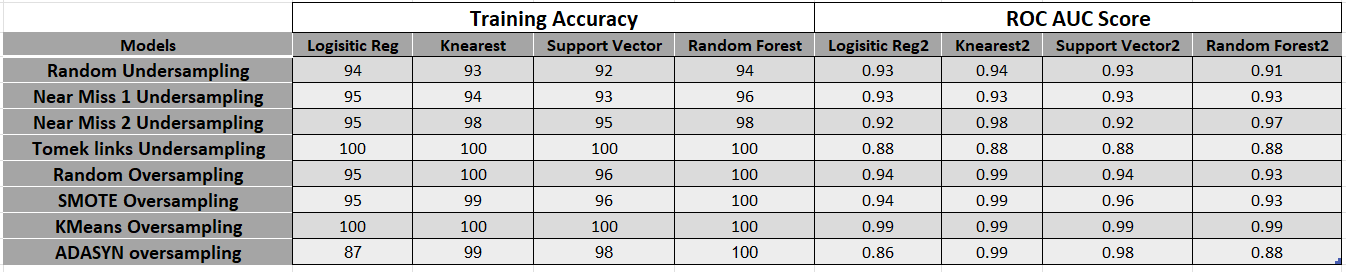

#### **For this dataset oversampling works better than undersampling**

However in some cases models of oversampling are overfitting, because they are performing great on training set but performing poorly on testing set. 

Finally, While working on the imbalanced dataset one should try various methods. And should use scores like ROC AUC, Precision Recall, Confusion Matrix to check the accuracy of model.

## **References**






*   https://imbalanced-learn.org/en/stable/index.html

*   https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

*   https://www.analyticsvidhya.com/blog/2016/03/practical-guide-deal-imbalanced-classification-problems/

*   https://www.jeremyjordan.me/imbalanced-data/
*   https://blog.dominodatalab.com/imbalanced-datasets/


*   https://blog.dominodatalab.com/imbalanced-datasets/


*   https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets


*   https://www.svds.com/learning-imbalanced-classes/


*   https://github.com/pb111/Data-Preprocessing-Project-Imbalanced-Classes-Problem
*   https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


*   https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
*   https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets







## **Licence**


#### **Copyright>  (Year:-2021) <Name:Sahil Sanjay Gadge>**



Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
